In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas.plotting import scatter_matrix
import seaborn as sns

In [231]:
df = pd.read_csv("train (1).csv", encoding="utf-8")

Задача предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике. choose - целевая переменная.

### feature engineering

In [232]:
df.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0
5,5,37.0,3.0,1050.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0
6,6,54.0,3.0,800.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52.0,1
7,7,32.0,2.0,2750.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,95.0,0
8,8,56.0,3.0,1300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,0
9,9,44.0,4.0,2350.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [234]:
df.describe(percentiles=[i/10 for i in range(1,10)])

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
10%,999.90000,36.000000,0.000000,1150.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,47.000000,0.000000
20%,1999.80000,39.000000,0.000000,1250.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,53.000000,0.000000
30%,2999.70000,42.000000,1.000000,1350.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,57.000000,0.000000
40%,3999.60000,44.000000,1.000000,1450.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
60%,5999.40000,48.000000,2.000000,1700.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,67.000000,0.000000


In [235]:
df['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [236]:
df['years_of_experience'].value_counts()

0.0    2774
1.0    1842
2.0    1743
3.0    1545
4.0    1177
5.0     581
6.0     234
7.0      73
8.0      22
9.0       9
Name: years_of_experience, dtype: int64

Как видно есть явно бесполезное поле id, а так же несколько признаков которые скорее являются категориальными, но представлены как числовые.

In [237]:
categorical_features = ['years_of_experience', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']
numerical_features = ['age', 'lesson_price', 'mean_exam_points']
target = "choose"

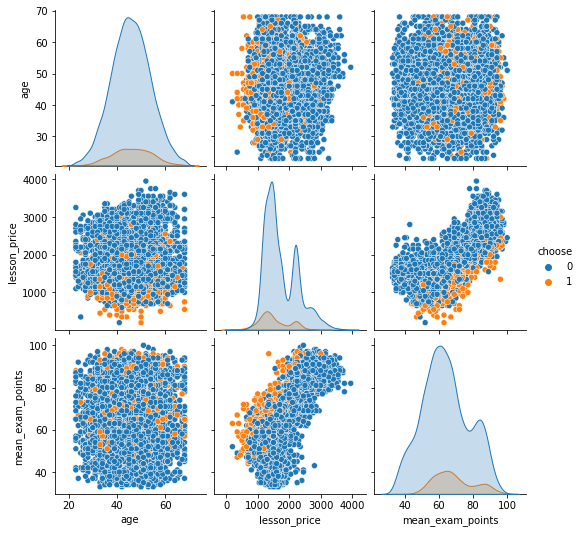

In [238]:
sns.pairplot(df[['age', 'lesson_price', 'mean_exam_points', 'choose']], hue='choose') 

In [239]:
def get_graphs_feature_for_target(df, feature_name, target_name):
    X = np.unique(df[feature_name].values)
    Y = pd.Series([round(np.mean(df[target_name].loc[df[feature_name] == i]), 2) for i in X], index=[f'{feature_name}={i}' for i in X])
    #Z = pd.Series([df.loc[df[feature_name] == i].shape[0] for i in X], index=[f'{feature_name}={i}' for i in X])
    
    rcParams["figure.figsize"] = 8, 6
    Y.plot(kind="barh")
    plt.xlabel(f'mean {target_name}')
    #plt.legend()
    plt.show()

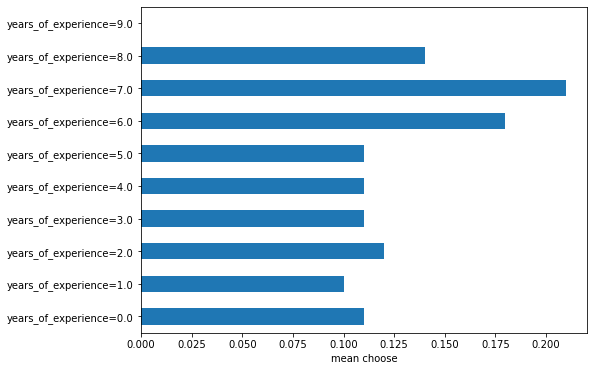

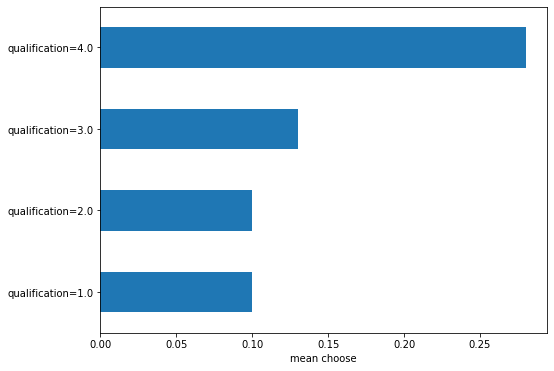

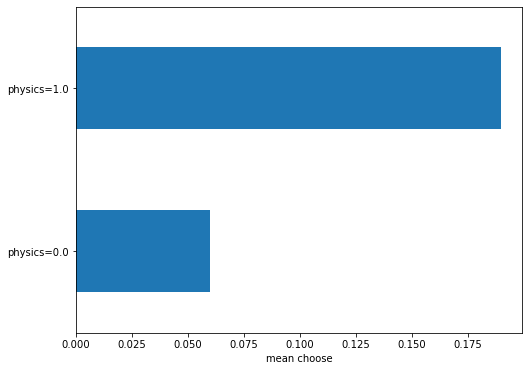

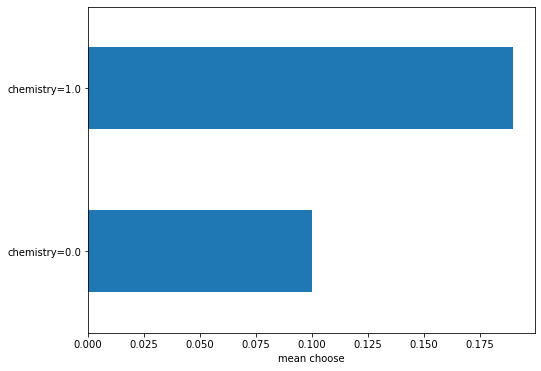

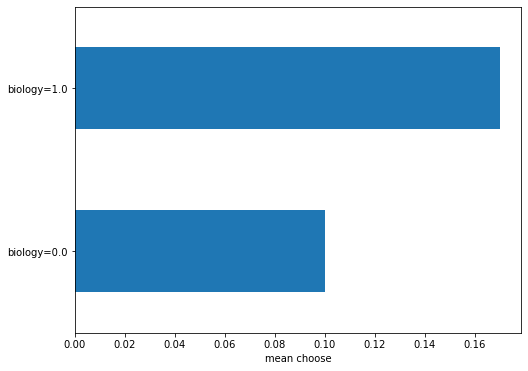

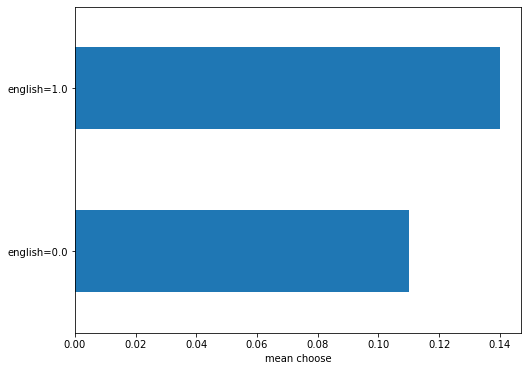

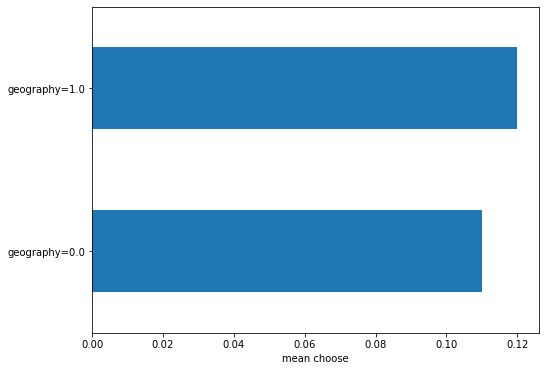

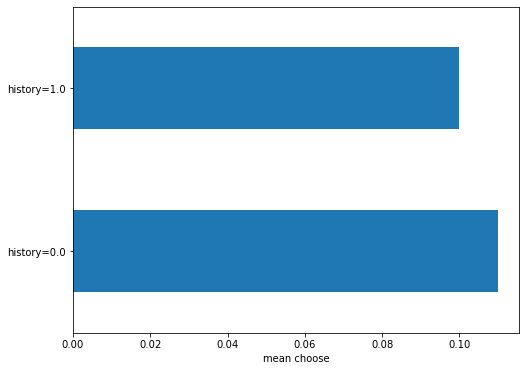

In [240]:
for i in categorical_features:
    get_graphs_feature_for_target(df, i, 'choose')

In [241]:
df.loc[df['years_of_experience'] > 6, 'years_of_experience'] = 6

In [242]:
df['years_of_experience'].value_counts()

0.0    2774
1.0    1842
2.0    1743
3.0    1545
4.0    1177
5.0     581
6.0     338
Name: years_of_experience, dtype: int64

In [243]:
df[categorical_features] = df[categorical_features].astype('object')
df.loc[df['mean_exam_points'] < 70, "top_30_best_percent_points"] = '0'
df.loc[df['mean_exam_points'] >= 70, "top_30_best_percent_points"] = '1'
categorical_features.append("top_30_best_percent_points")
df = pd.get_dummies(df, prefix=categorical_features)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            10000 non-null  int64  
 1   age                           10000 non-null  float64
 2   lesson_price                  10000 non-null  float64
 3   mean_exam_points              10000 non-null  float64
 4   choose                        10000 non-null  int64  
 5   years_of_experience_0.0       10000 non-null  uint8  
 6   years_of_experience_1.0       10000 non-null  uint8  
 7   years_of_experience_2.0       10000 non-null  uint8  
 8   years_of_experience_3.0       10000 non-null  uint8  
 9   years_of_experience_4.0       10000 non-null  uint8  
 10  years_of_experience_5.0       10000 non-null  uint8  
 11  years_of_experience_6.0       10000 non-null  uint8  
 12  qualification_1.0             10000 non-null  uint8  
 13  qu

### 2 обучить любой классификатор (какой вам нравится)

### ??? Обучить на чём? На просто полученных данных?

In [267]:
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split

In [268]:
feautre = ['Id', 'age', 'lesson_price', 'mean_exam_points',
       'years_of_experience_0.0', 'years_of_experience_1.0',
       'years_of_experience_2.0', 'years_of_experience_3.0',
       'years_of_experience_4.0', 'years_of_experience_5.0',
       'years_of_experience_6.0', 'qualification_1.0', 'qualification_2.0',
       'qualification_3.0', 'qualification_4.0', 'physics_0.0', 'physics_1.0',
       'chemistry_0.0', 'chemistry_1.0', 'biology_0.0', 'biology_1.0',
       'english_0.0', 'english_1.0', 'geography_0.0', 'geography_1.0',
       'history_0.0', 'history_1.0', 'top_30_best_percent_points_0',
       'top_30_best_percent_points_1']
x_train, x_test, y_train, y_test = train_test_split(df[feautre], df[target], test_size=0.3, random_state=7)

In [269]:
model_1 = xgb.XGBClassifier()

In [270]:
model_1.fit(x_train, y_train)

C:\Users\Ergney\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [271]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

In [272]:
evaluate_results(y_test, model_1.predict(x_test))

Classification results:
f1: 27.54%
roc: 58.52%
recall: 20.25%
precision: 43.05%


4 далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть

In [289]:
df.loc[df[target] == 1]

,Id,age,lesson_price,mean_exam_points,choose,years_of_experience_0.0,years_of_experience_1.0,years_of_experience_2.0,years_of_experience_3.0,years_of_experience_4.0,...,biology_0.0,biology_1.0,english_0.0,english_1.0,geography_0.0,geography_1.0,history_0.0,history_1.0,top_30_best_percent_points_0,top_30_best_percent_points_1
1,1,52.0,1250.0,57.0,1,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
3,3,33.0,1050.0,66.0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
6,6,54.0,800.0,52.0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
17,17,38.0,2250.0,81.0,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
20,20,53.0,1300.0,72.0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,9922,44.0,1350.0,60.0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
9934,9934,42.0,1400.0,71.0,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
9937,9937,34.0,1500.0,57.0,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
9958,9958,36.0,1200.0,51.0,1,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


In [290]:
#x_train['target'] = y_train
P = df.loc[df[target] == 1][0:250]
P_index = P.index

P_index
U = df.drop(P_index,axis='index')
x_train, x_test, y_train, y_test = train_test_split(U[feautre], U[target], test_size=0.3, random_state=7)

5 применить random negative sampling для построения классификатора в новых условиях

In [287]:
P

,Id,age,lesson_price,mean_exam_points,choose,years_of_experience_0.0,years_of_experience_1.0,years_of_experience_2.0,years_of_experience_3.0,years_of_experience_4.0,...,biology_0.0,biology_1.0,english_0.0,english_1.0,geography_0.0,geography_1.0,history_0.0,history_1.0,top_30_best_percent_points_0,top_30_best_percent_points_1
1,1,52.0,1250.0,57.0,1,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
3,3,33.0,1050.0,66.0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
6,6,54.0,800.0,52.0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
17,17,38.0,2250.0,81.0,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
20,20,53.0,1300.0,72.0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,3303,40.0,1550.0,60.0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3307,3307,50.0,1100.0,51.0,1,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
3308,3308,43.0,1950.0,84.0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
3315,3315,40.0,1250.0,56.0,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
